# Домашнее задание #1. Обработка данных в Pandas

> **Выполнил**: Давидчук Никита Олегович <br>
> **Датасет**: `cars_moldova.csv`

## 0. Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Откроем файл с данными и посмотрим на него.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dayekb/Basic_ML_Alg/main/cars.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41007 entries, 0 to 41006
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  41007 non-null  object 
 1   Model                 41007 non-null  object 
 2   Year                  41007 non-null  int64  
 3   Style                 41007 non-null  object 
 4   Distance              41007 non-null  float64
 5   Engine_capacity(cm3)  41007 non-null  float64
 6   Fuel_type             41007 non-null  object 
 7   Transmission          41007 non-null  object 
 8   Price(euro)           41007 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.8+ MB


In [4]:
df.head()

Make         Model  Year      Style  Distance  Engine_capacity(cm3)  \
0      Toyota         Prius  2011  Hatchback  195000.0                1800.0   
1     Renault  Grand Scenic  2014  Universal  135000.0                1500.0   
2  Volkswagen          Golf  1998  Hatchback       1.0                1400.0   
3     Renault        Laguna  2012  Universal  110000.0                1500.0   
4        Opel         Astra  2006  Universal  200000.0                1600.0   

      Fuel_type Transmission  Price(euro)  
0        Hybrid    Automatic       7750.0  
1        Diesel       Manual       8550.0  
2        Petrol       Manual       2200.0  
3        Diesel       Manual       6550.0  
4  Metan/Propan       Manual       4100.0

Посмотрим, какие типы данных у нас есть в таблице.

In [5]:
num_columns, cat_columns = [], []

for col in df.columns:
    if df[col].dtype == "object":
        cat_columns.append(col)
    else:
        num_columns.append(col)

print("Numerical columns: ", num_columns)
print("Categorical columns: ", cat_columns)

Numerical columns:  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)']
Categorical columns:  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']


In [6]:
# count unique values by categorical columns
for col in cat_columns:
    print(col, ":", df[col].nunique())

Make : 87
Model : 829
Style : 12
Fuel_type : 6
Transmission : 2


## 2. Анализ числовых признаков

Статистика по числовым признакам

In [7]:
df.describe()

Year      Distance  Engine_capacity(cm3)   Price(euro)
count  41007.000000  4.100700e+04          41007.000000  4.100700e+04
mean    2007.976175  4.567353e+05           1853.856732  9.727109e+03
std        8.241487  4.451897e+06            700.364532  5.043926e+04
min     1900.000000  0.000000e+00              0.000000  1.000000e+00
25%     2004.000000  8.750000e+04           1500.000000  3.500000e+03
50%     2009.000000  1.680000e+05           1800.000000  6.600000e+03
75%     2014.000000  2.300000e+05           2000.000000  1.215000e+04
max     2021.000000  1.000000e+08           9999.000000  1.000000e+07

Построим гистограммы для числовых признаков.

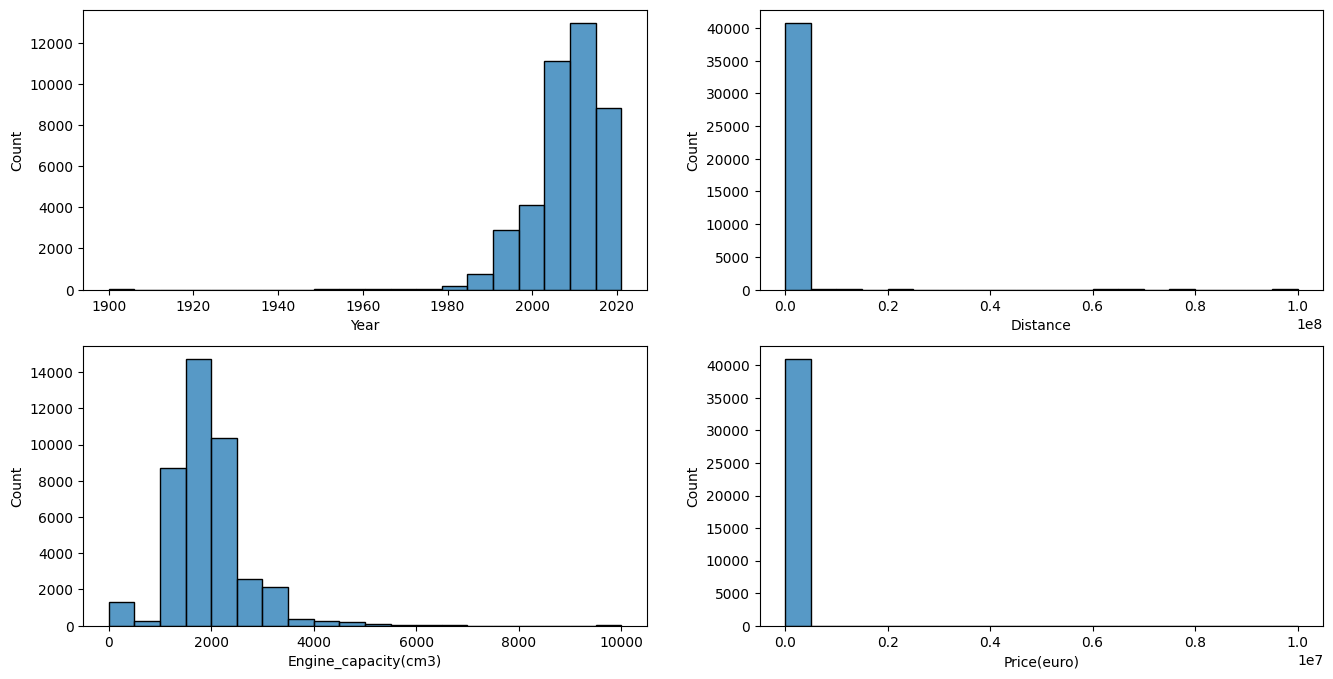

In [8]:
width = 2
height = int(np.ceil(len(num_columns) / width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16, 8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height, width, idx + 1)
    sns.histplot(data=df,x=column_name, bins=20)

Столбцы имеют явные аномалии, особенно Distance и Price(euro). Чтобы лучше понять эти аномалии посмотрим на столбцы в логарифмическом масштабе.

<AxesSubplot: xlabel='Price(euro)', ylabel='Count'>

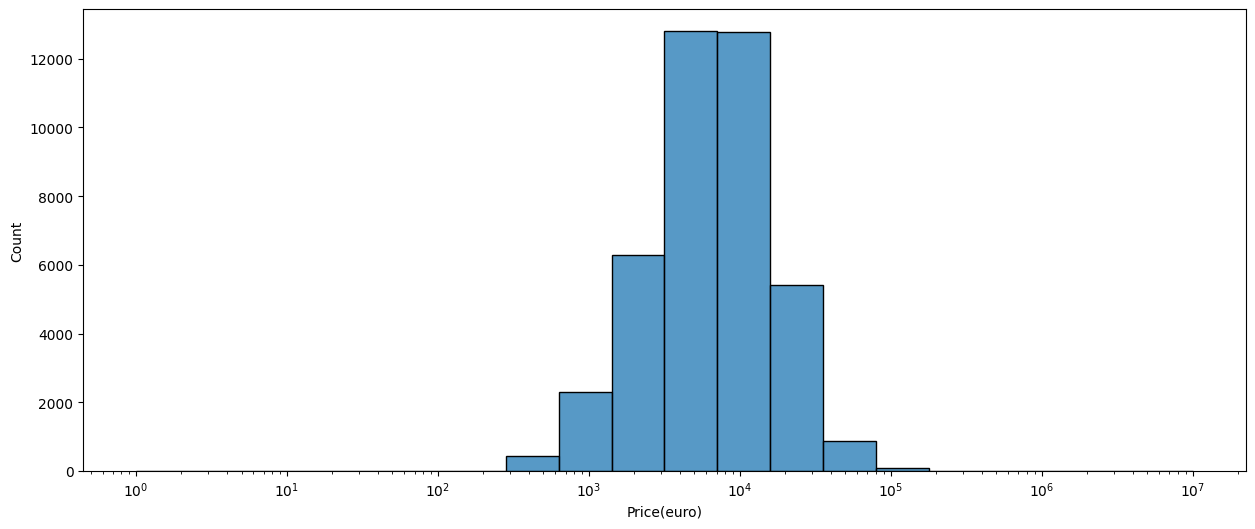

In [9]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='Price(euro)', bins=20, log_scale=True)

Удалим данные из df[‘Distance’], которые равны 0.

<AxesSubplot: xlabel='Distance', ylabel='Count'>

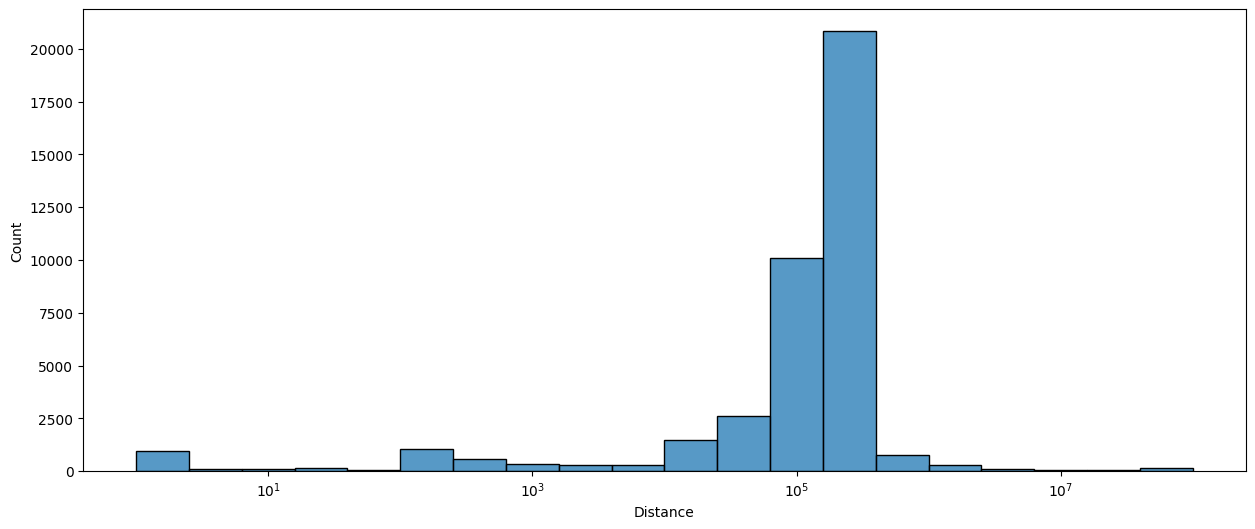

In [10]:
question_distance = df[df['Distance'] == 0]
df = df.drop(question_distance.index)

plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='Distance', bins=20, log_scale=True)

Очистим данные, используя информацию с гистограмм и "здравого смысла"

In [11]:
# здравый смысл
question_dist = df[(df.Year < 2021) & (df.Distance < 1100)]
df = df.drop(question_dist.index)

# анализ гистограмм
question_dist = df[(df.Distance > 6e5)]
df = df.drop(question_dist.index)

# здравый смысл
question_engine = df[df["Engine_capacity(cm3)"] < 200]
df = df.drop(question_engine.index)

# здравый смысл
question_engine = df[df["Engine_capacity(cm3)"] > 5000]
df = df.drop(question_engine.index)

# здравый смысл 
question_price = df[(df["Price(euro)"] < 101)]
df = df.drop(question_price.index)

# анализ гистограмм
question_price = df[df["Price(euro)"] > 5e4]
df = df.drop(question_price.index)

#анализ гистограмм
question_year = df[df.Year < 1981]
df = df.drop(question_year.index)

df = df.reset_index(drop=True)
df.tail()

Make         Model  Year      Style  Distance  \
35419  Land Rover    Freelander  2002  Crossover  225000.0   
35420       Dacia     Logan Mcv  2015  Universal   89000.0   
35421    Mercedes       E Class  2016      Sedan   50000.0   
35422       Mazda             6  2006      Combi  370000.0   
35423     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  
35419                1800.0  Metan/Propan       Manual       4400.0  
35420                1500.0        Diesel       Manual       7000.0  
35421                1950.0        Diesel    Automatic      29500.0  
35422                2000.0        Diesel       Manual       4000.0  
35423                1500.0        Diesel       Manual       4000.0

Взглянем, сколько значений осталось в таблице

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35424 entries, 0 to 35423
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  35424 non-null  object 
 1   Model                 35424 non-null  object 
 2   Year                  35424 non-null  int64  
 3   Style                 35424 non-null  object 
 4   Distance              35424 non-null  float64
 5   Engine_capacity(cm3)  35424 non-null  float64
 6   Fuel_type             35424 non-null  object 
 7   Transmission          35424 non-null  object 
 8   Price(euro)           35424 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.4+ MB


Посмотрим на результат

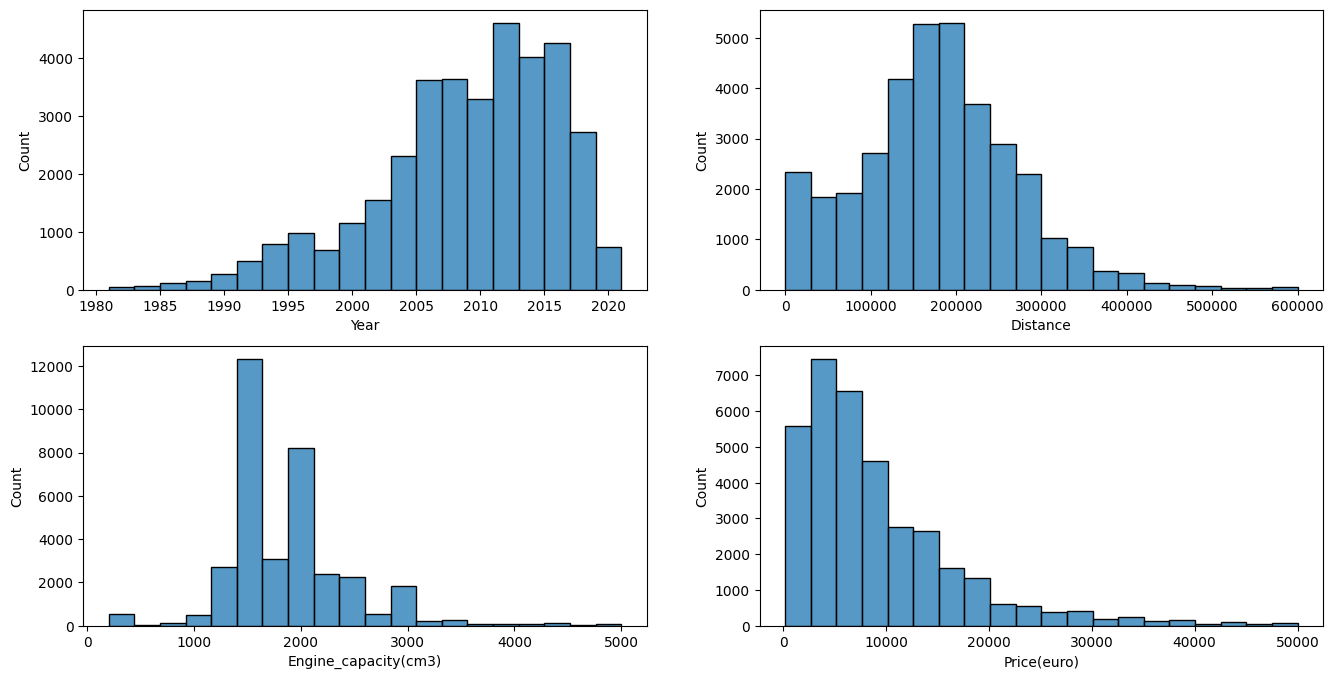

In [13]:
width = 2
height = int(np.ceil(len(num_columns) / width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16, 8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height, width, idx + 1)
    sns.histplot(data=df,x=column_name, bins=20)

Зависимость числовых параметров друг от друга

<Figure size 1500x1500 with 0 Axes>

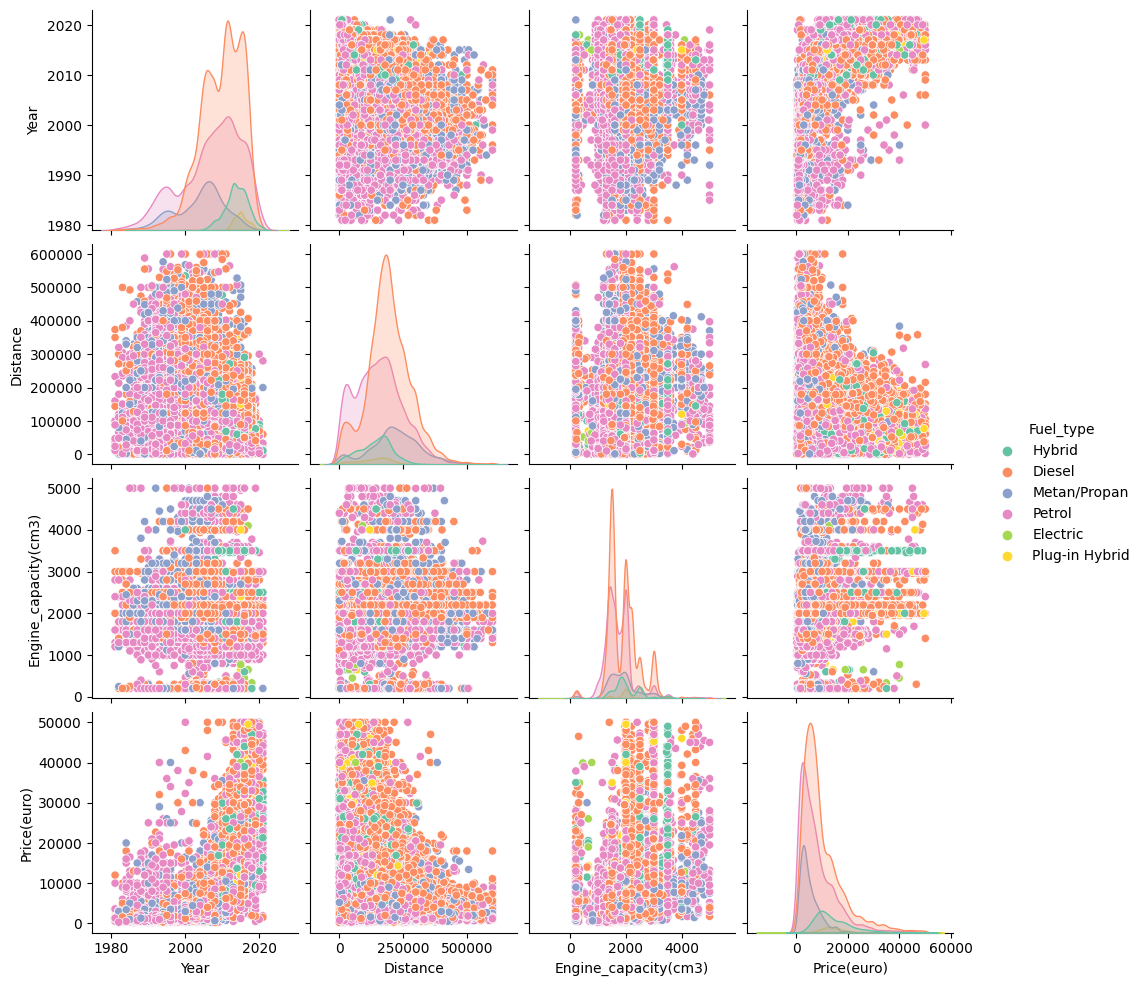

In [14]:
fig = plt.figure(figsize=(15,15))
sns.pairplot(data = df, hue ='Fuel_type', palette='Set2'); 

## 3. Предварительная обработка

Нормализация

In [15]:
DF_norm  = df.copy()
Xmin = df[num_columns].min()
Xmax = df[num_columns].max()

DF_norm[num_columns] = (df[num_columns] - Xmin) / ( Xmax - Xmin)

<AxesSubplot: xlabel='Price(euro)', ylabel='Count'>

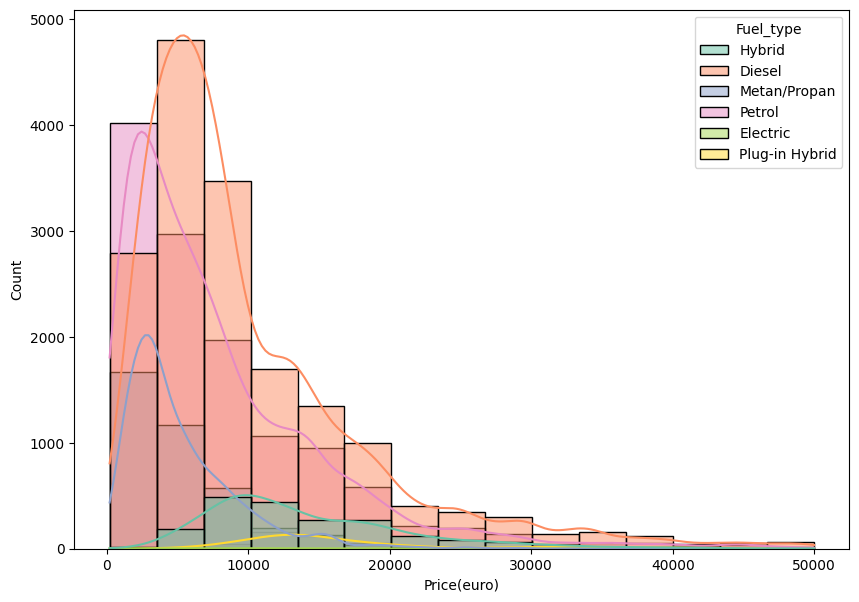

In [16]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data=df, x='Price(euro)', hue='Fuel_type', bins=15, kde=True, palette='Set2')

<AxesSubplot: xlabel='Price(euro)', ylabel='Count'>

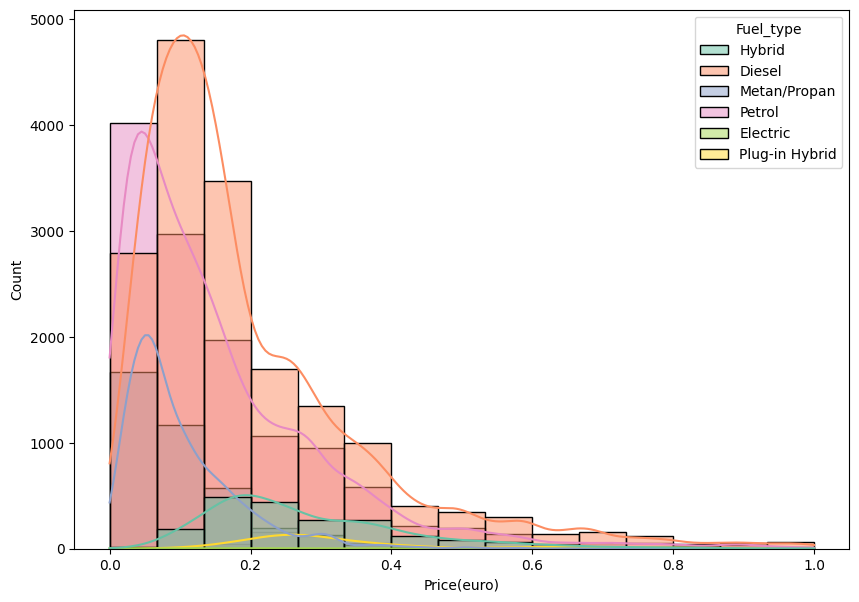

In [17]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data=DF_norm, x='Price(euro)', hue='Fuel_type', bins=15, kde=True, palette='Set2')

Стандартизация

In [18]:
DF_scaled = df.copy()
M = df[num_columns].mean()
STD = df[num_columns].std()
DF_scaled[num_columns] = (df[num_columns] - M) / STD

<AxesSubplot: xlabel='Price(euro)', ylabel='Count'>

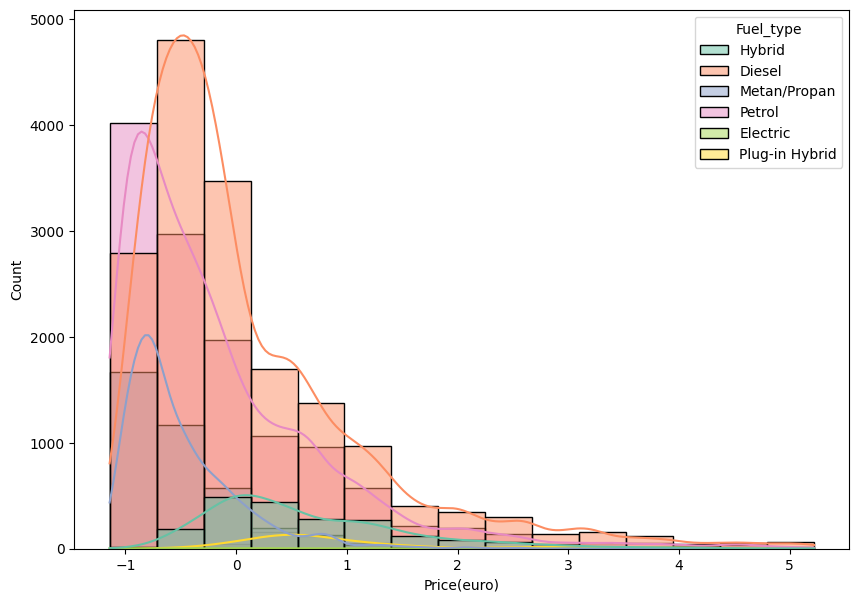

In [19]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data=DF_scaled, x='Price(euro)', hue='Fuel_type', bins=15, kde=True, palette='Set2')

Нелинейное преобразование <br><br>
Сначала логарифмирование, потом стандартизация

<AxesSubplot: xlabel='Price(euro)', ylabel='Count'>

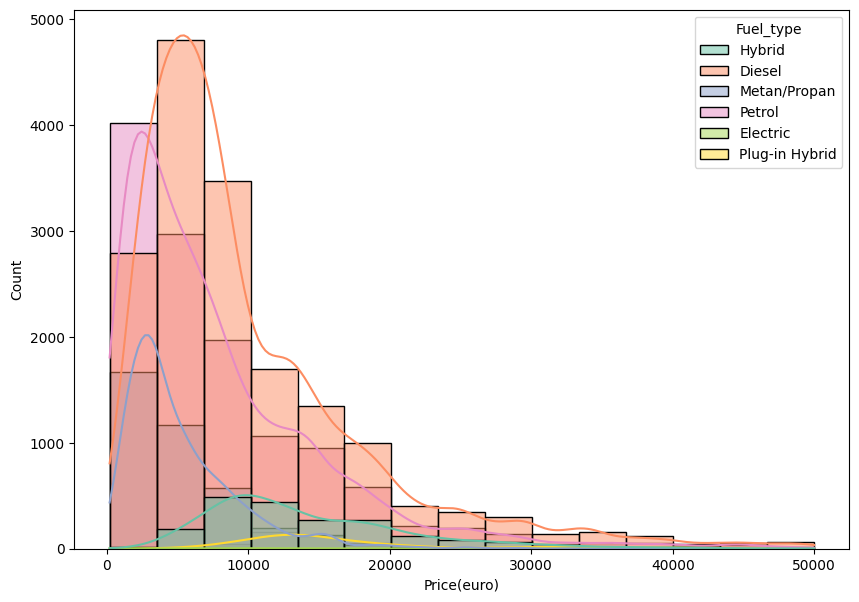

In [20]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data=df, x='Price(euro)', hue='Fuel_type', bins=15, kde=True, palette='Set2')

In [21]:
DF_power = df.copy()
DF_power[num_columns] = np.log(DF_power[num_columns])
M = DF_power[num_columns].mean()
STD = DF_power[num_columns].std()
DF_power[num_columns] = (DF_power[num_columns] - M) / STD

<AxesSubplot: xlabel='Price(euro)', ylabel='Count'>

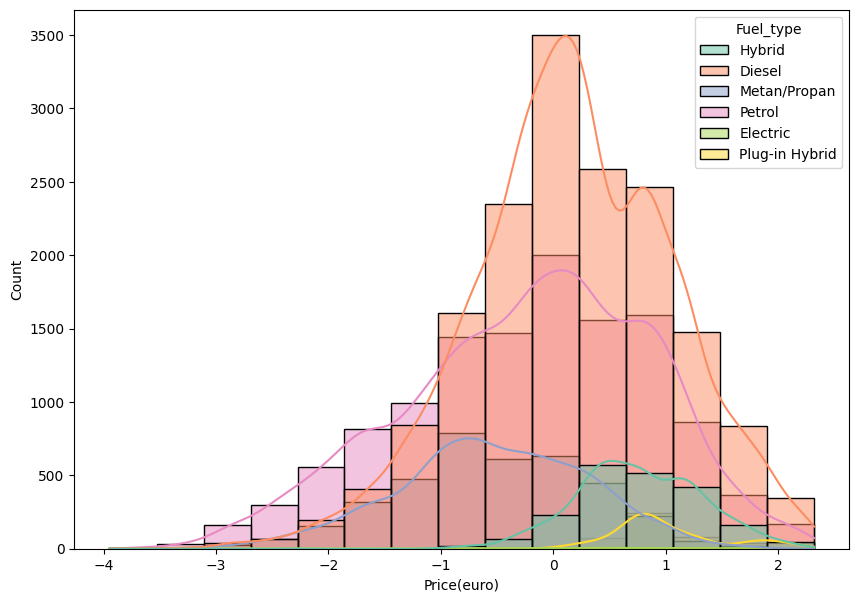

In [22]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data=DF_power, x='Price(euro)', hue='Fuel_type', bins=15, kde=True, palette='Set2')

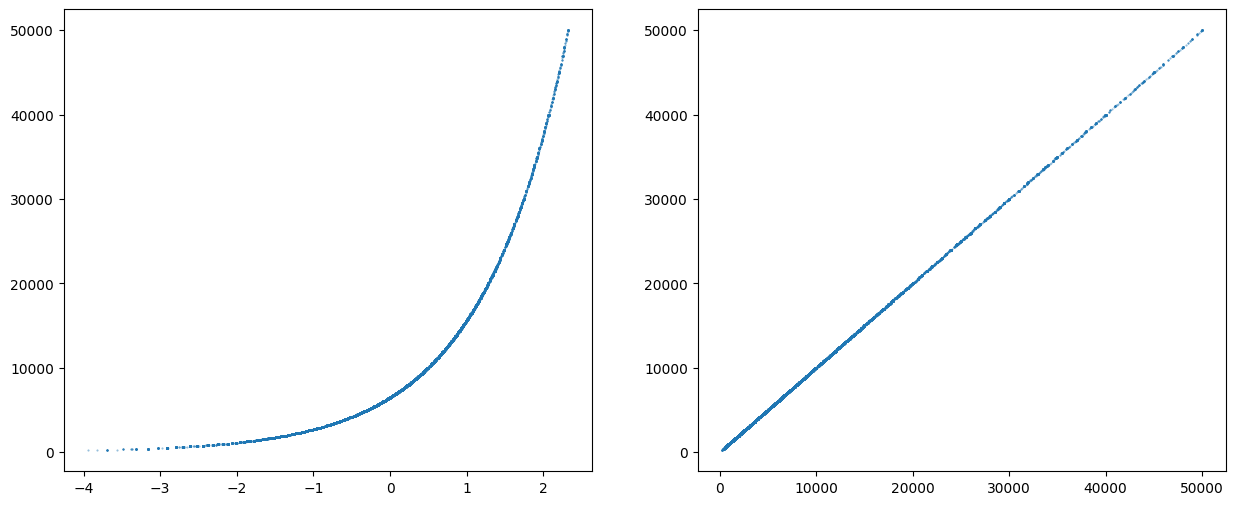

In [23]:
plt.figure(figsize=(15, 6))

# Сравнение после лографимирования и стандартизации

plt.subplot(1, 2, 1)
plt.plot(DF_power['Price(euro)'], df['Price(euro)'], '.', alpha=0.5, markersize=1)

# Исходные данные

plt.subplot(1, 2, 2)
plt.plot(df['Price(euro)'], df['Price(euro)'], '.', alpha=0.5, markersize=1)

## 4. Добавление новых признаков

<AxesSubplot: xlabel='km_per_year', ylabel='Count'>

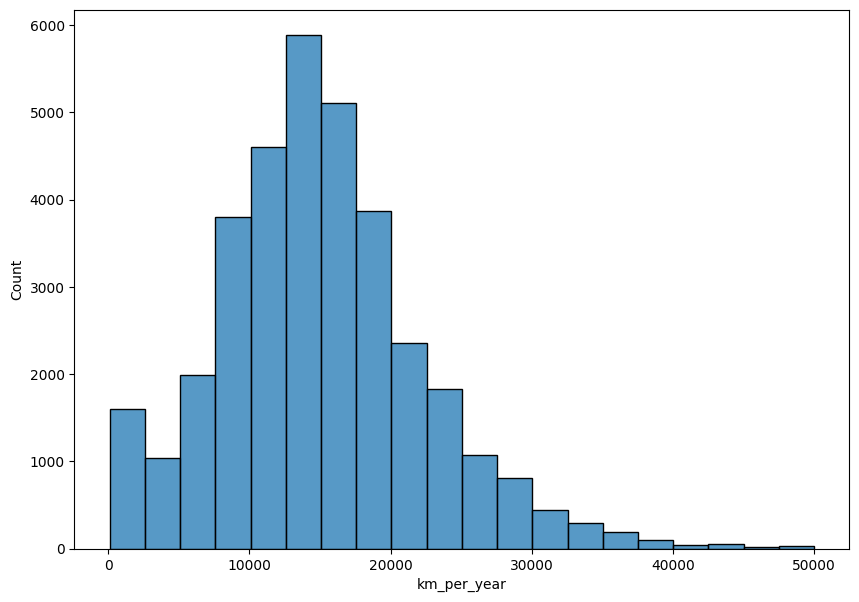

In [24]:
# get current year
import datetime

current_year = datetime.datetime.now().year

# create new column with car age
df['Age'] = current_year - df['Year']
df["km_per_year"] = df["Distance"] / df["Age"]

# drop data with km_per_year > 5e4

question_km = df[df["km_per_year"] > 5e4]
df = df.drop(question_km.index)

# drop data with km_per_year < 100

question_km = df[df["km_per_year"] < 100]
df = df.drop(question_km.index)

df = df.reset_index(drop=True)

plt.figure(figsize=(10,7))
sns.histplot(data=df, x='km_per_year', bins=20)

<AxesSubplot: xlabel='km_per_year', ylabel='Distance'>

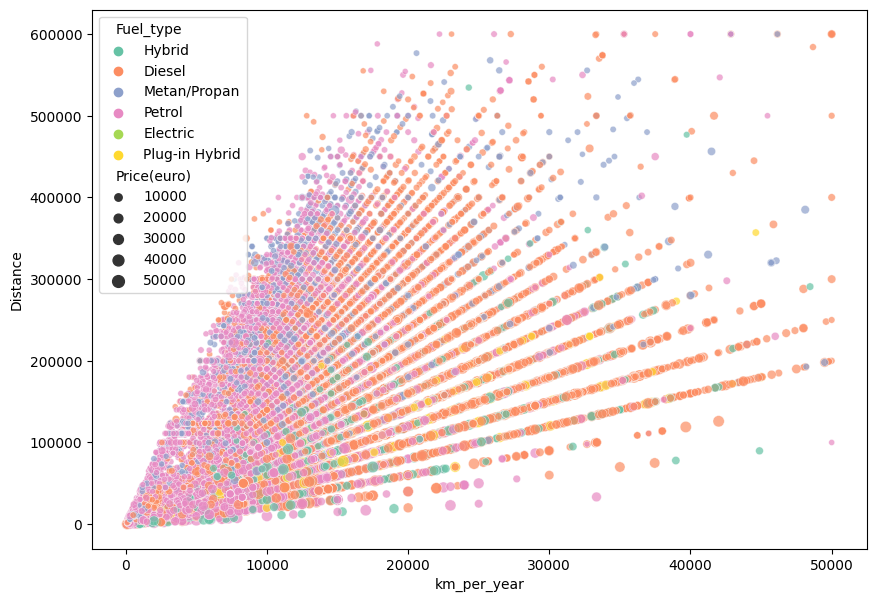

In [25]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x="km_per_year", y="Distance", hue="Fuel_type", size="Price(euro)", alpha = 0.7, palette='Set2')

<AxesSubplot: xlabel='km_per_year', ylabel='Year'>

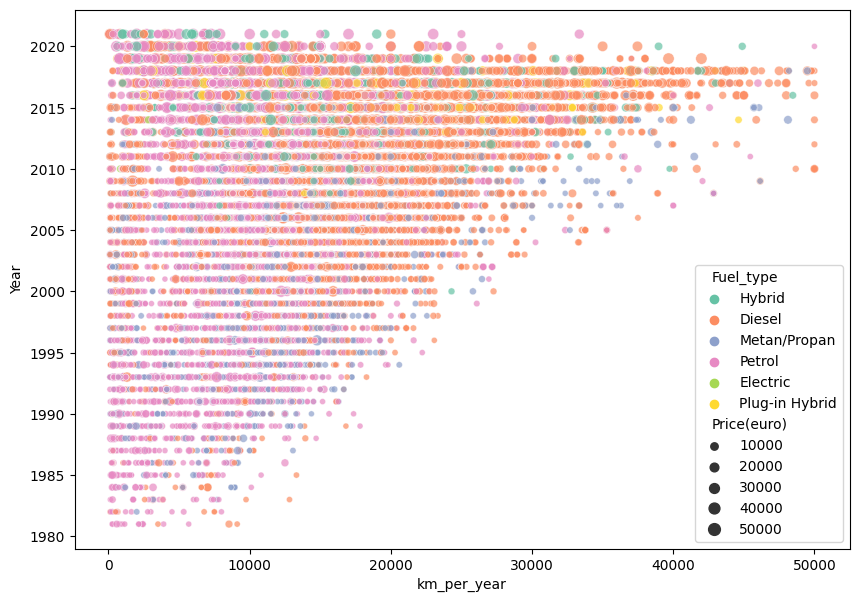

In [26]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x="km_per_year", y="Year", hue="Fuel_type", size="Price(euro)", alpha = 0.7, palette='Set2')

Добавим категориальный признак: средний пробег автомобиля в год

In [27]:
# create a quantile-based discretization function of km_per_year: small distance per year, medium distance per year, large distance per year

km_per_year = lambda x: 'small' if x < 10000 else 'medium' if x < 30000 else 'large'


df['km_per_year_cat'] = df['km_per_year'].apply(km_per_year)

## 5. Удаление аномалий и связанных признаков

In [28]:
num_columns.append('km_per_year')
num_columns

['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_per_year']

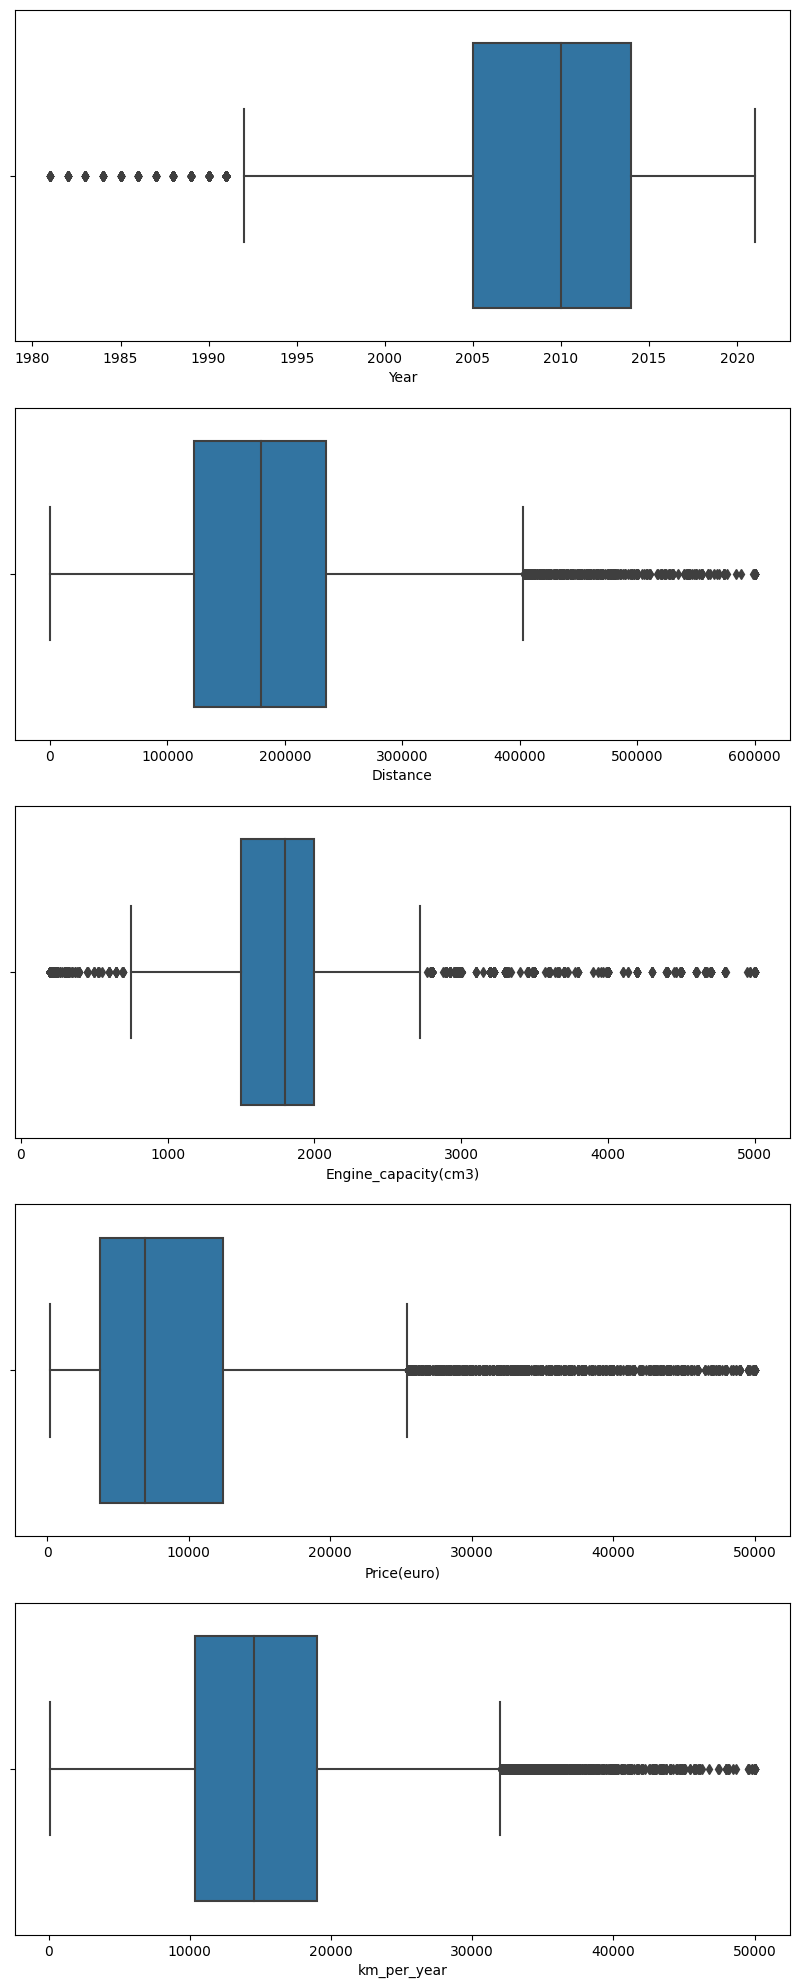

In [29]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10,25))

for idx, column_name in enumerate(num_columns):
    plt.subplot(5,1, idx+1)
    sns.boxplot(data=df, x=column_name)

Посмотрим на корреляцию числовых столбцов

In [30]:
cm = sns.light_palette("blue", as_cmap=True)

df.corr().style.background_gradient(cmap=cm, vmin = -1, vmax=1)

## 6. Категориальные данные

Посмотрим на число повторений результата в каждом категориальном признаке

In [31]:
cat_columns.append('km_per_year_cat')
cat_columns

['Make', 'Model', 'Style', 'Fuel_type', 'Transmission', 'km_per_year_cat']

In [32]:
df[cat_columns].nunique()

Make                78
Model              771
Style               12
Fuel_type            6
Transmission         2
km_per_year_cat      3
dtype: int64

Исключим редкие записи без потери точности, запишем их в один тип - `rare`

In [33]:
counts = df.Make.value_counts()

counts

Volkswagen    3710
Toyota        3399
Mercedes      3216
BMW           2733
Renault       2616
              ... 
Zotye            1
Changan          1
Tata             1
Saturn           1
Pontiac          1
Name: Make, Length: 78, dtype: int64

In [34]:
counts.median()

33.5

In [35]:
# make a smart replacement with price of car, where cheap is Rare_cheap, expensive is Rare_expensive
rare = counts[counts < 25]

# здравый смысл
rare_cheap = df[df.Make.isin(rare.index) & (df["Price(euro)"] <= 25000)].Make.value_counts()
rare_expensive = df[df.Make.isin(rare.index) & (df["Price(euro)"] > 25000)].Make.value_counts()

In [36]:
# make a dictionary with replacement
rare_dict = {}
for i in rare.index:
    # just for self-check
    print(i)
    
    if i in rare_cheap.index:
        rare_dict[i] = 'Rare_cheap'

    elif i in rare_expensive.index:
        rare_dict[i] = 'Rare_expensive'

    else:
        rare_dict[i] = 'Rare'

# replace rare values
df.Make = df.Make.replace(rare_dict)

df.Make.value_counts()

Moskvich / Izh
Chery
Acura
UAZ
Great Wall
Lancia
Cadillac
Saab
Brilliance
Byd
Alta marca
Lifan
Lada
Zaz
Isuzu
LuAZ
Buick
GMC
Ravon
Haima
Tesla
Geely
Scion
Maserati
Datsun
Hummer
Faw
Mercedes-Maybach
ARO
Groz
Abarth
Zotye
Changan
Tata
Saturn
Pontiac


Volkswagen        3710
Toyota            3399
Mercedes          3216
BMW               2733
Renault           2616
Opel              1952
Skoda             1900
Audi              1613
Ford              1489
Dacia             1457
Nissan            1448
Hyundai           1429
Honda              962
KIA                732
Mitsubishi         668
Lexus              645
Volvo              621
Mazda              476
Vaz                462
Chevrolet          431
Peugeot            414
Citroen            324
Rare_cheap         273
Land Rover         267
Seat               258
Suzuki             257
Fiat               194
Porsche            178
Subaru             154
Rover               95
Chrysler            93
Jeep                83
Infiniti            78
Mini                76
Jaguar              73
Daewoo              66
Lincoln             54
Dodge               51
Alfa Romeo          38
Ssangyong           34
Smart               33
GAZ                 30
Daihatsu            28
Rare_expens

In [37]:
counts = df.Model.value_counts()

counts

E Class     1207
5 Series    1111
Passat       917
Megane       882
Astra        855
            ... 
BS3            1
Tracer         1
Z Series       1
G Series       1
Siber          1
Name: Model, Length: 771, dtype: int64

In [40]:
rare = counts[counts < 50]
df["Model"] = df["Model"].replace(rare.index.values, "Rare")
df.Model.value_counts()

Rare                 6442
E Class              1207
5 Series             1111
Passat                917
Megane                882
                     ... 
i30                    52
Roomster               52
Avensis Verso          52
S60                    51
Range Rover Sport      50
Name: Model, Length: 147, dtype: int64

## 7. Сохранение DataFrame в файл
Сохраним чистые данные в файл

In [41]:
df.to_csv("cars_moldova_clear.csv", index=False)

## 8. Приведение категориальных признаков к числовым

**Бинарные признаки**

In [42]:
df['Transmission'] = df['Transmission'].map({'Automatic': 1, 'Manual': 0})

**Кодирование многозначных признаков**

In [43]:
df_se = df.copy()
df_se[cat_columns] = df_se[cat_columns].astype('category')

for column in cat_columns:
    df_se[column] = df_se[column].cat.codes

df_se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35117 entries, 0 to 35116
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  35117 non-null  int8   
 1   Model                 35117 non-null  int16  
 2   Year                  35117 non-null  int64  
 3   Style                 35117 non-null  int8   
 4   Distance              35117 non-null  float64
 5   Engine_capacity(cm3)  35117 non-null  float64
 6   Fuel_type             35117 non-null  int8   
 7   Transmission          35117 non-null  int8   
 8   Price(euro)           35117 non-null  float64
 9   Age                   35117 non-null  int64  
 10  km_per_year           35117 non-null  float64
 11  km_per_year_cat       35117 non-null  int8   
dtypes: float64(4), int16(1), int64(2), int8(5)
memory usage: 1.8 MB


In [44]:
df_se = df.copy()

if 'km_per_year_cat' not in cat_columns:
    cat_columns += ['km_per_year_cat']

df_se[cat_columns] = df_se[cat_columns].astype('category')

for _, column_name in enumerate(cat_columns):
    df_se[column_name] =  df_se[column_name].cat.codes
df_se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35117 entries, 0 to 35116
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  35117 non-null  int8   
 1   Model                 35117 non-null  int16  
 2   Year                  35117 non-null  int64  
 3   Style                 35117 non-null  int8   
 4   Distance              35117 non-null  float64
 5   Engine_capacity(cm3)  35117 non-null  float64
 6   Fuel_type             35117 non-null  int8   
 7   Transmission          35117 non-null  int8   
 8   Price(euro)           35117 non-null  float64
 9   Age                   35117 non-null  int64  
 10  km_per_year           35117 non-null  float64
 11  km_per_year_cat       35117 non-null  int8   
dtypes: float64(4), int16(1), int64(2), int8(5)
memory usage: 1.8 MB


In [45]:
df_se.head()

Make  Model  Year  Style  Distance  Engine_capacity(cm3)  Fuel_type  \
0    40     99  2011      4  195000.0                1800.0          2   
1    32     68  2014     11  135000.0                1500.0          0   
2    32     78  2012     11  110000.0                1500.0          0   
3    27     24  2006     11  200000.0                1600.0          3   
4    23    136  2000      5  300000.0                2200.0          0   

   Transmission  Price(euro)  Age   km_per_year  km_per_year_cat  
0             1       7750.0   11  17727.272727                1  
1             0       8550.0    8  16875.000000                1  
2             0       6550.0   10  11000.000000                1  
3             0       4100.0   16  12500.000000                1  
4             0       3490.0   22  13636.363636                1

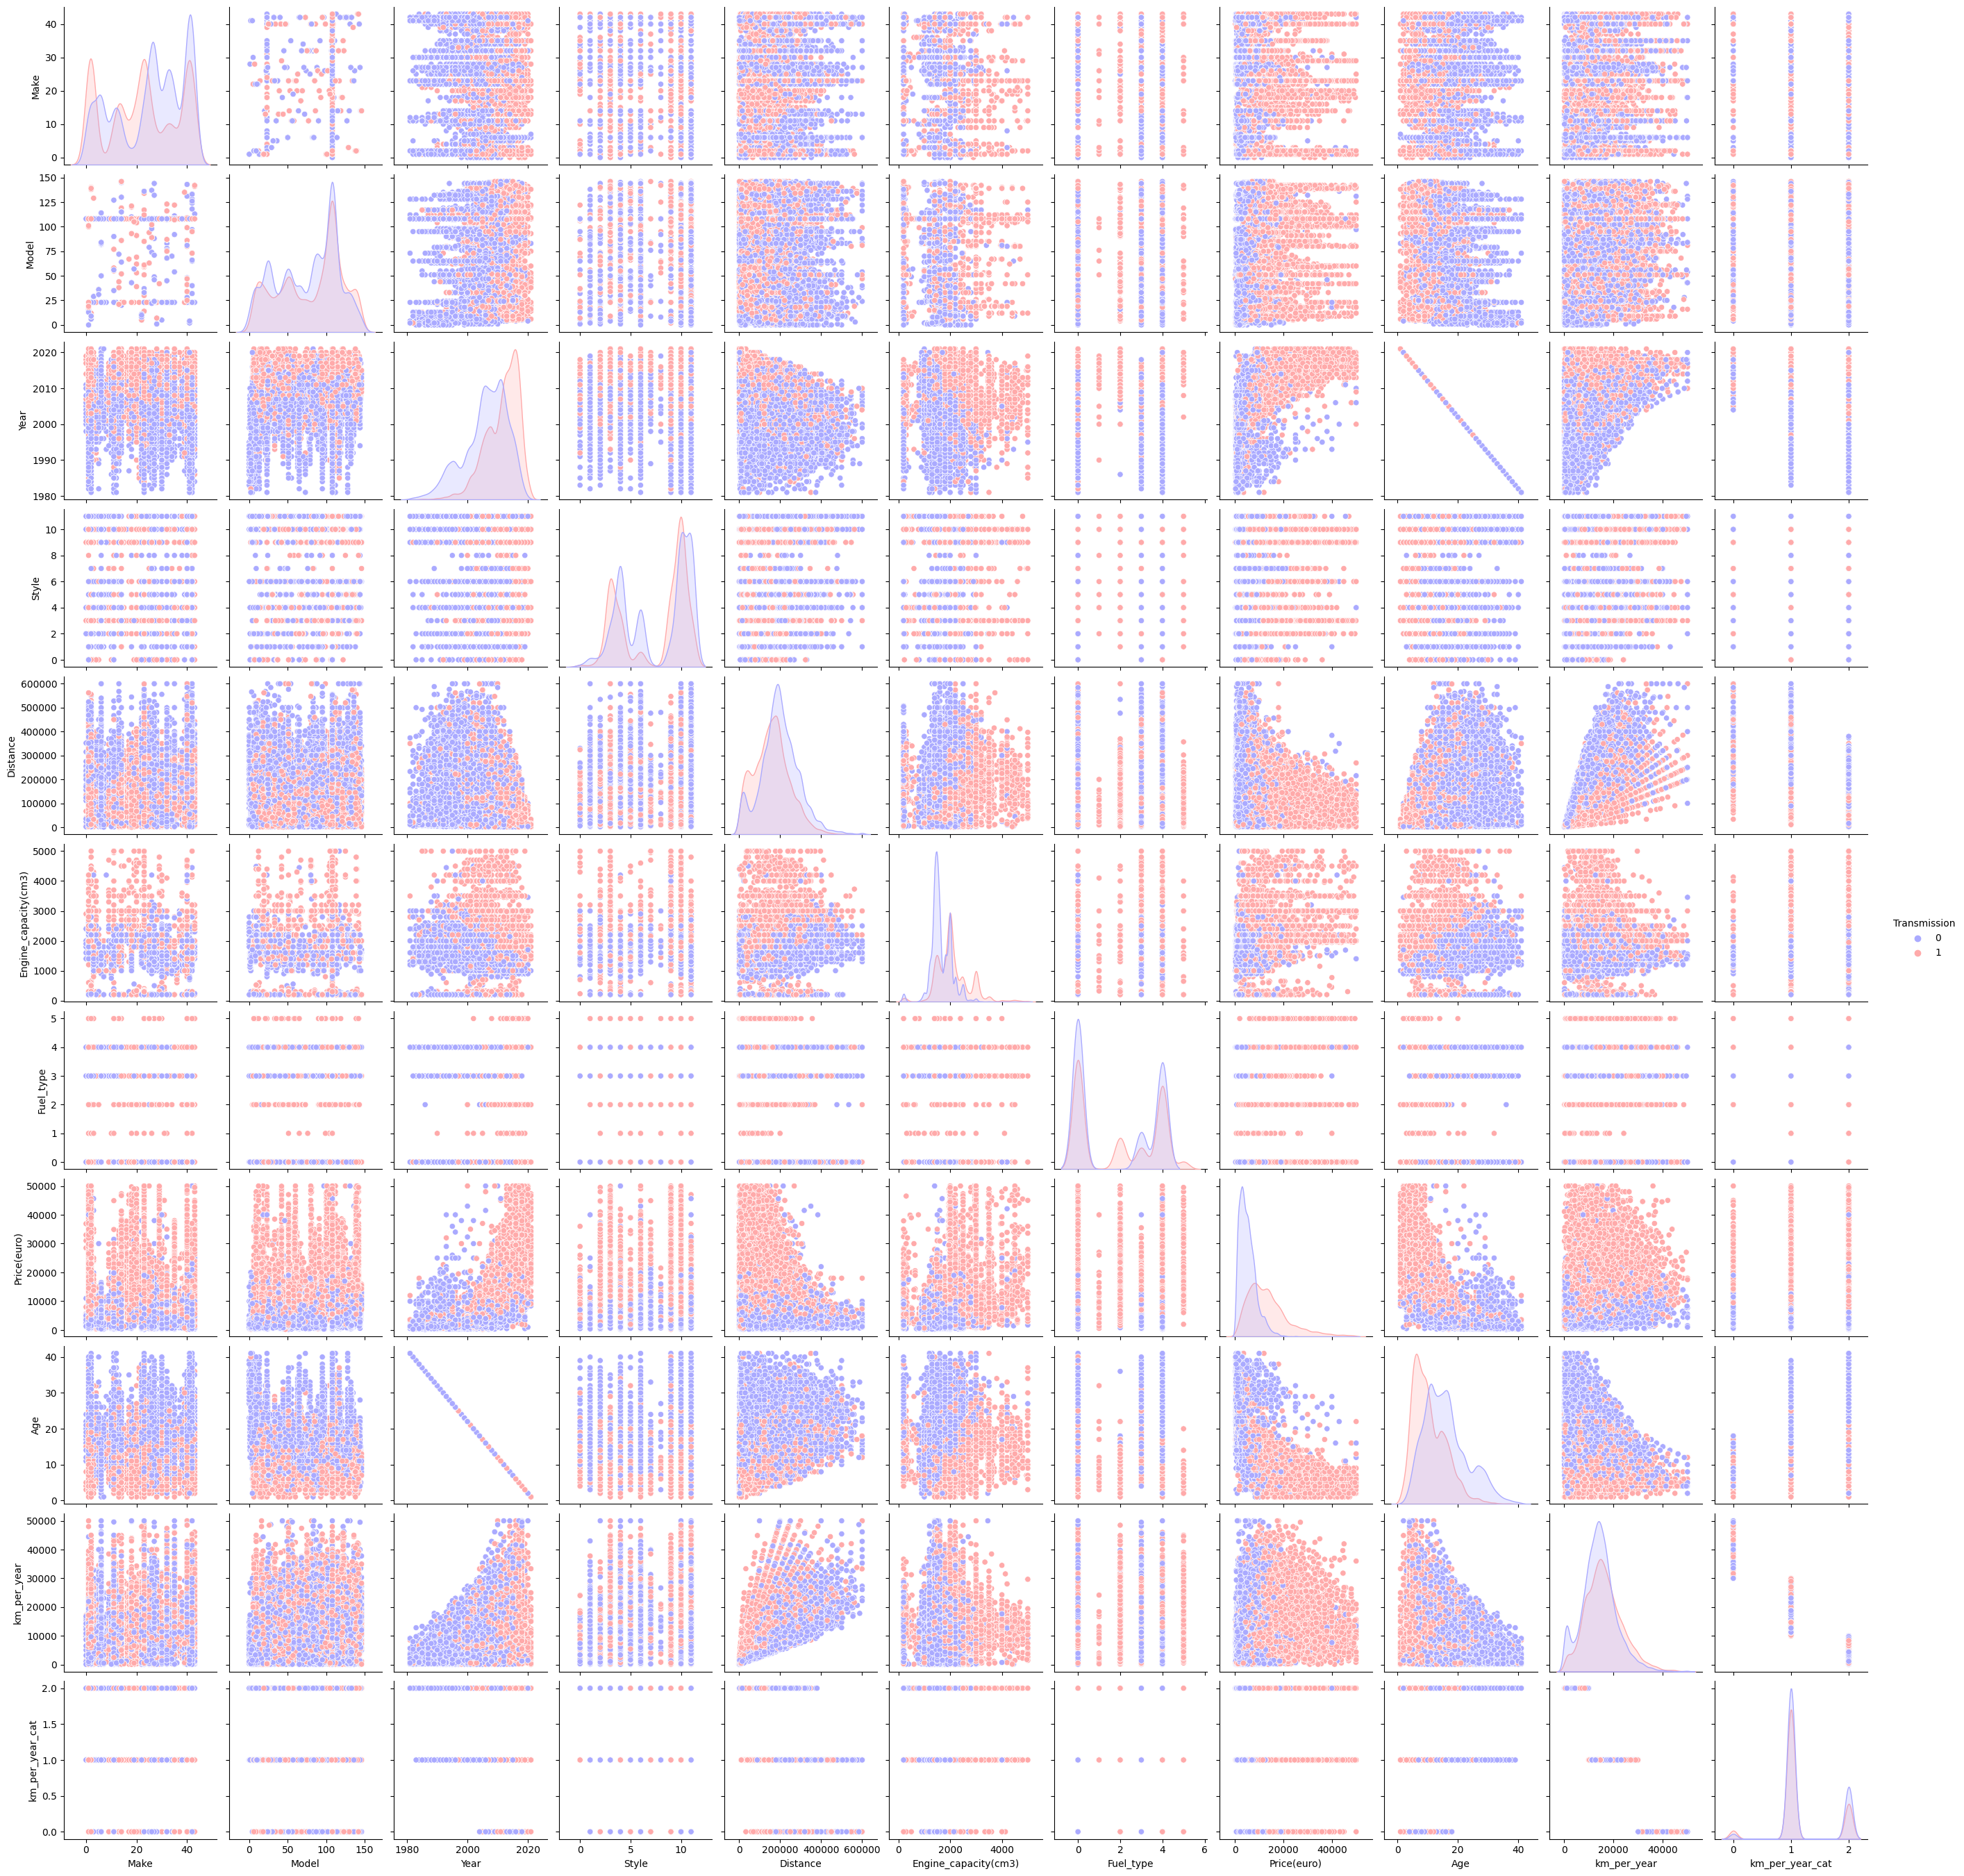

In [46]:
sns.pairplot(data=df_se, hue='Transmission', palette='bwr')

**One-hot кодирование многозначных признаков**

In [47]:
df_ohe = df.copy()
df_ohe = pd.get_dummies(df_ohe)
df_ohe.tail()

Year  Distance  Engine_capacity(cm3)  Transmission  Price(euro)  Age  \
35112  2002  225000.0                1800.0             0       4400.0   20   
35113  2015   89000.0                1500.0             0       7000.0    7   
35114  2016   50000.0                1950.0             1      29500.0    6   
35115  2006  370000.0                2000.0             0       4000.0   16   
35116  2006  300000.0                1500.0             0       4000.0   16   

        km_per_year  Make_Alfa Romeo  Make_Audi  Make_BMW  ...  \
35112  11250.000000                0          0         0  ...   
35113  12714.285714                0          0         0  ...   
35114   8333.333333                0          0         0  ...   
35115  23125.000000                0          0         0  ...   
35116  18750.000000                0          0         0  ...   

       Style_Universal  Fuel_type_Diesel  Fuel_type_Electric  \
35112                0                 0                   0   
35113                1                 1                   0   
35114                0                 1                   0   
35115                0                 1                   0   
35116                0                 1                   0   

       Fuel_type_Hybrid  Fuel_type_Metan/Propan  Fuel_type_Petrol  \
35112                 0                       1                 0   
35113                 0                       0                 0   
35114                 0                       0                 0   
35115                 0                       0                 0   
35116                 0                       0                 0   

       Fuel_type_Plug-in Hybrid  km_per_year_cat_large  \
35112                         0                      0   
35113                         0                      0   
35114                         0                      0   
35115                         0                      0   
35116                         0                      0   

       km_per_year_cat_medium  km_per_year_cat_small  
35112                       1                      0  
35113                       1                      0  
35114                       0                      1  
35115                       1                      0  
35116                       1                      0  

[5 rows x 219 columns]

In [48]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35117 entries, 0 to 35116
Columns: 219 entries, Year to km_per_year_cat_small
dtypes: float64(4), int64(3), uint8(212)
memory usage: 9.0 MB


Сохранение DataFrame в файл

In [49]:
df_se.to_csv("cars_moldova_cat_num.csv", index=False)
df_ohe.to_csv("cars_moldova_onehot.csv", index=False)